
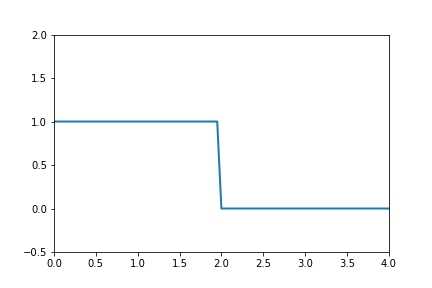
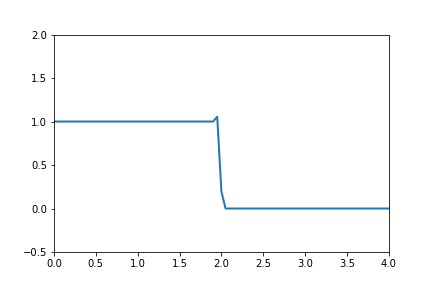
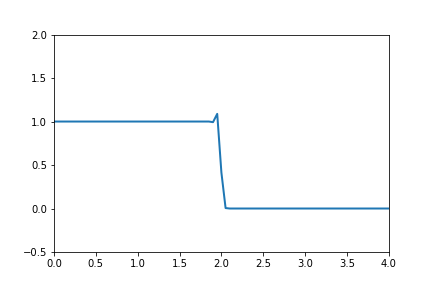
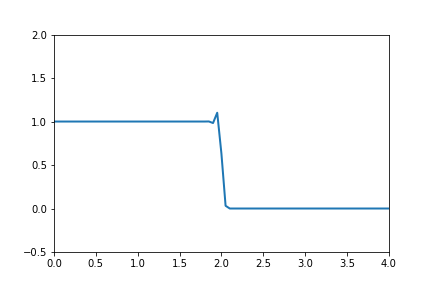
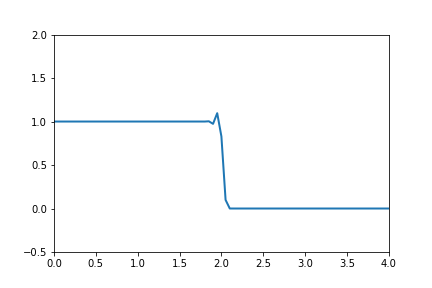
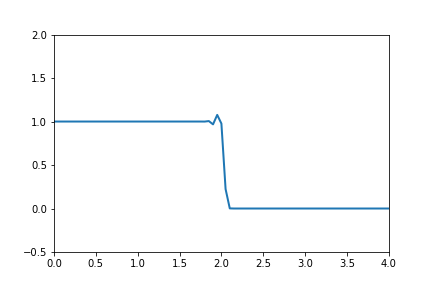
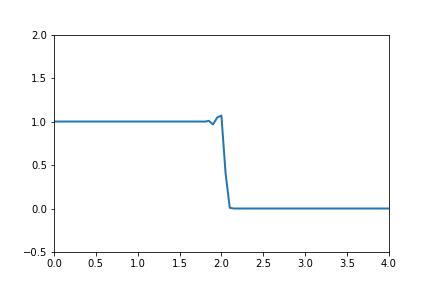
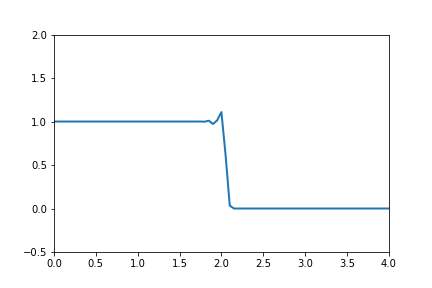
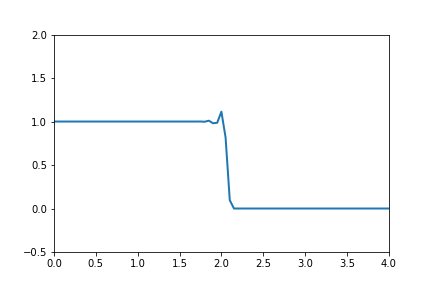
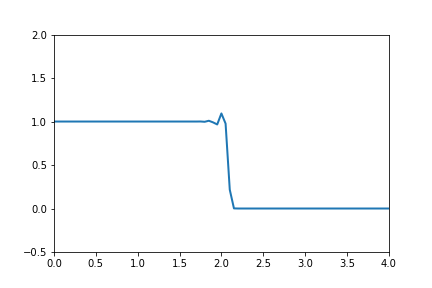
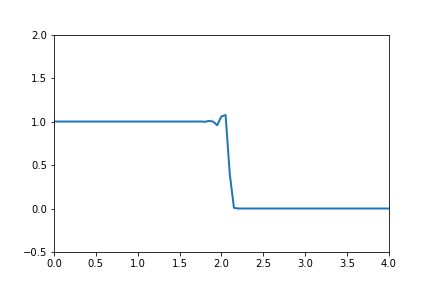
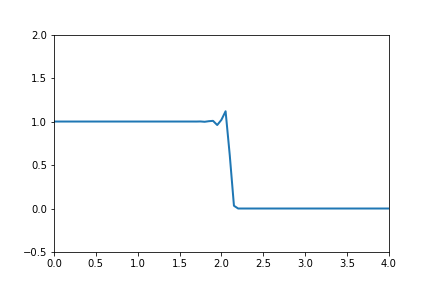
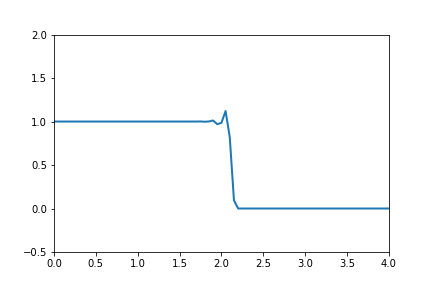
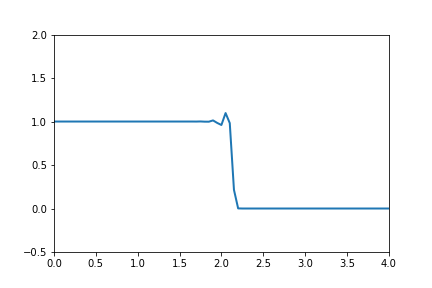
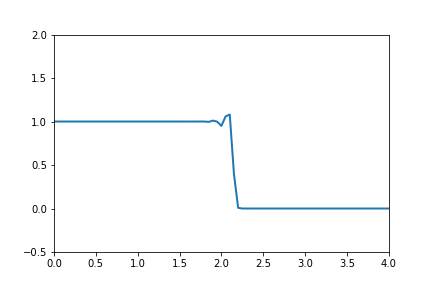
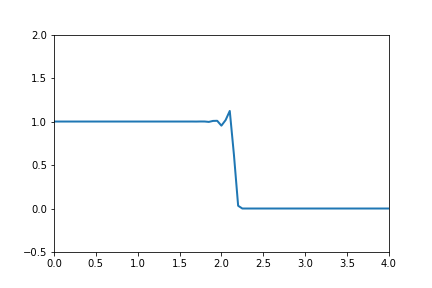
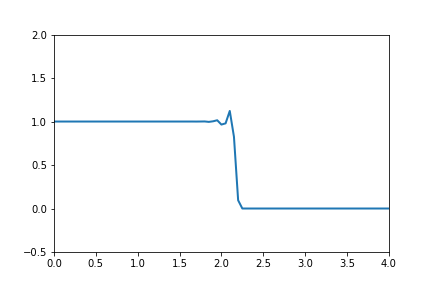
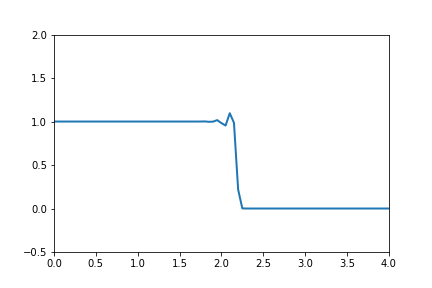
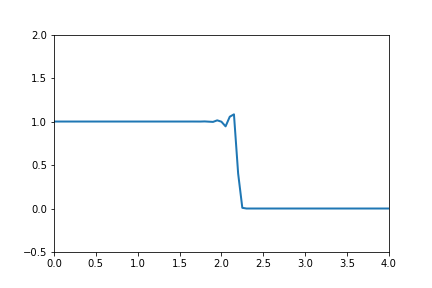
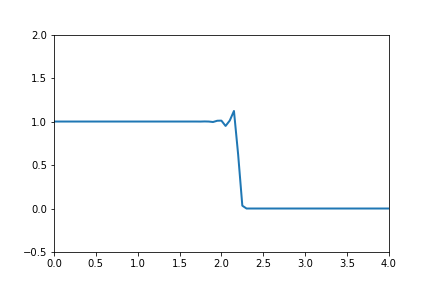
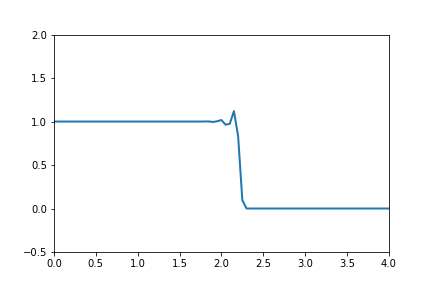
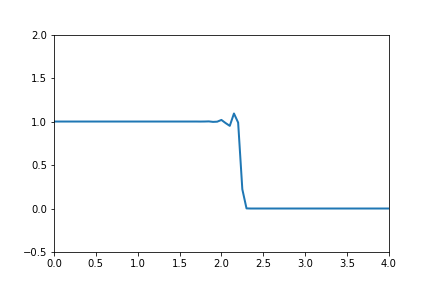
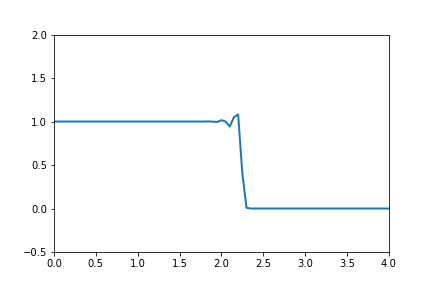
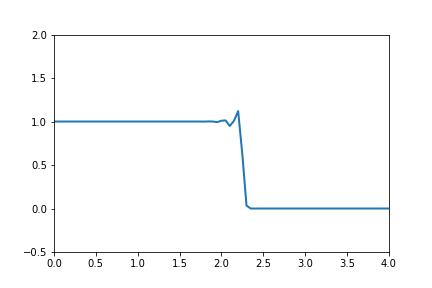
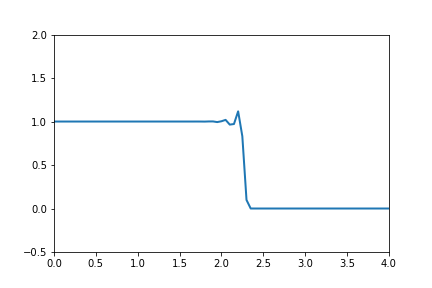
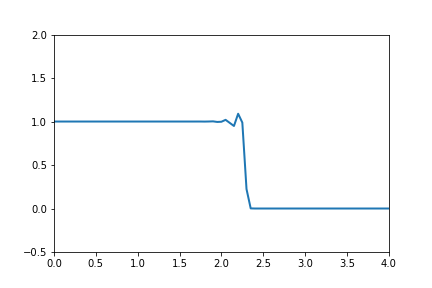
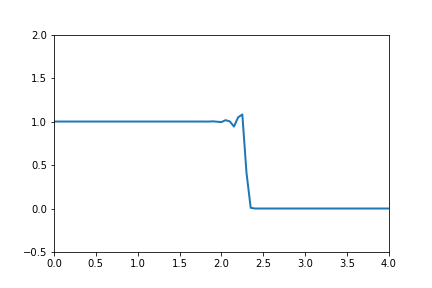
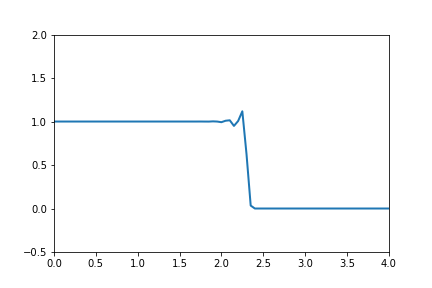
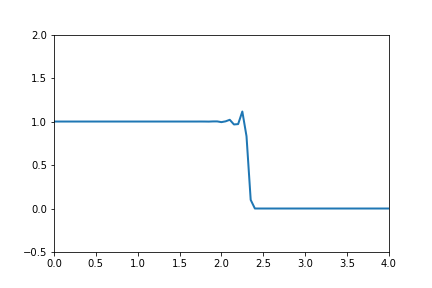
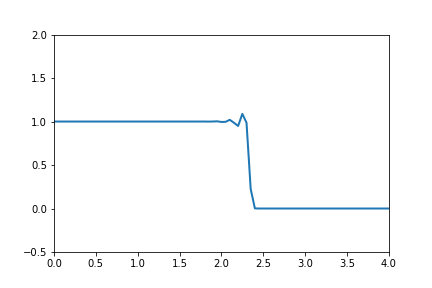
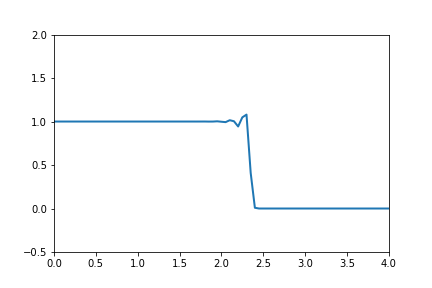
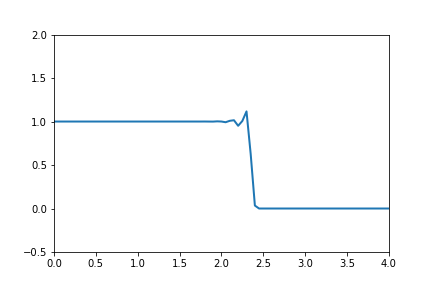
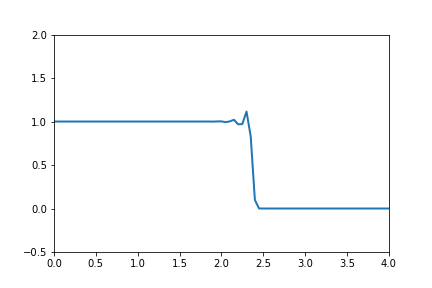
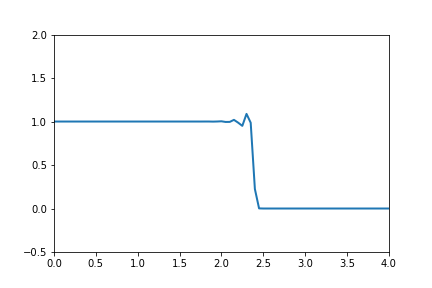
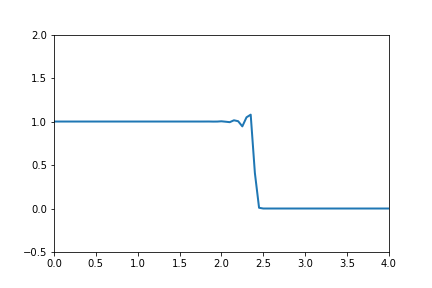
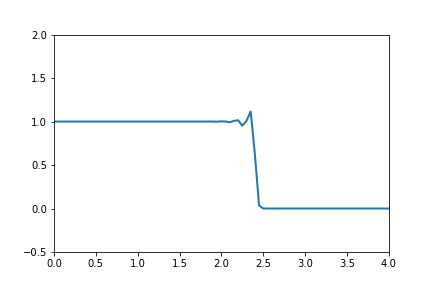
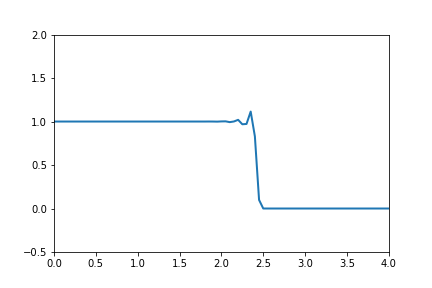
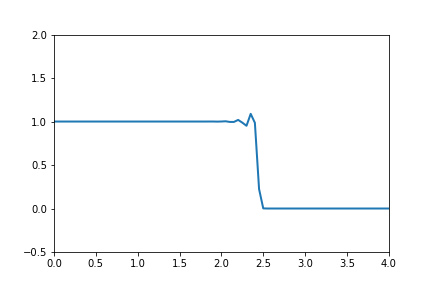
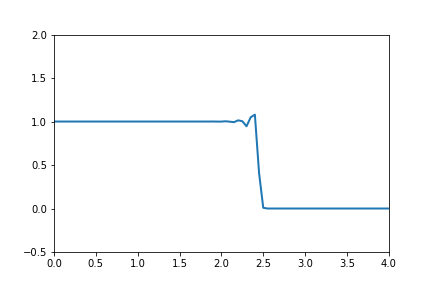
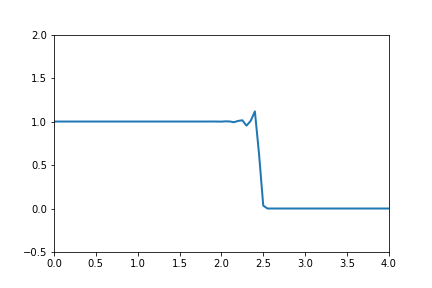
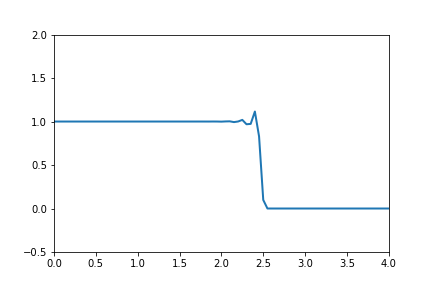
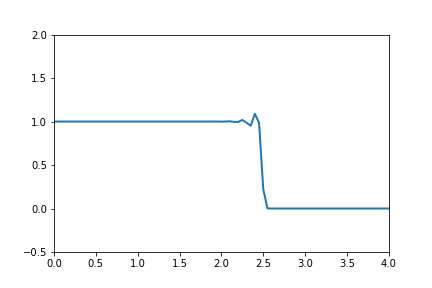
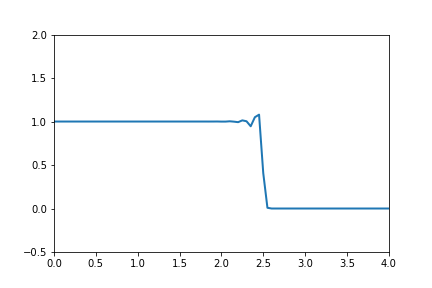
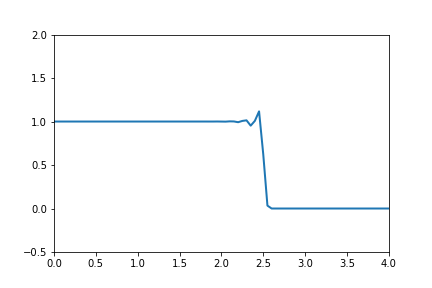
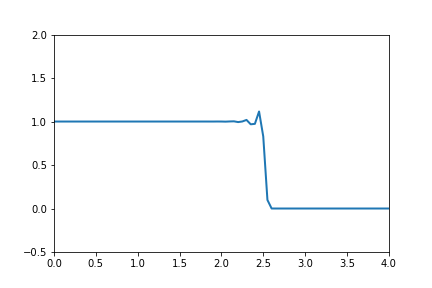
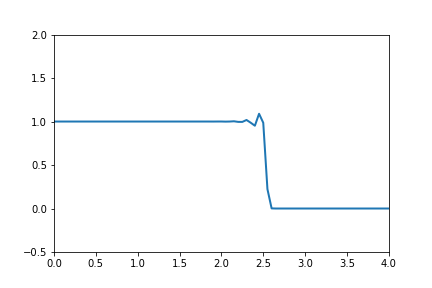
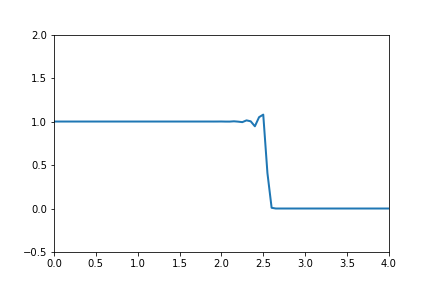
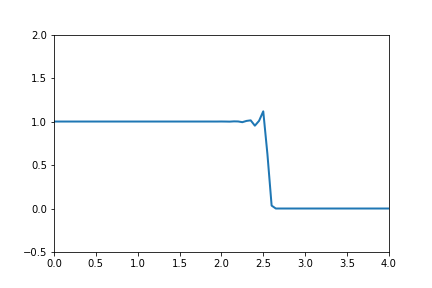
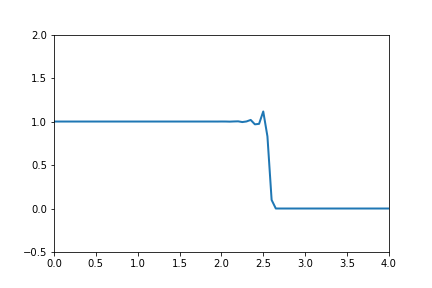
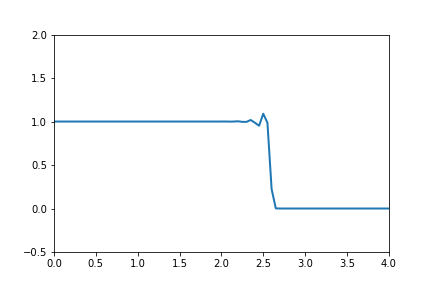
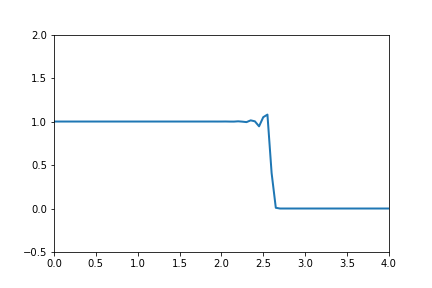
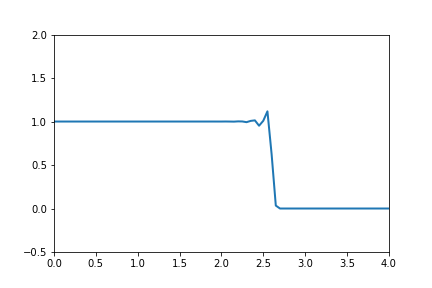
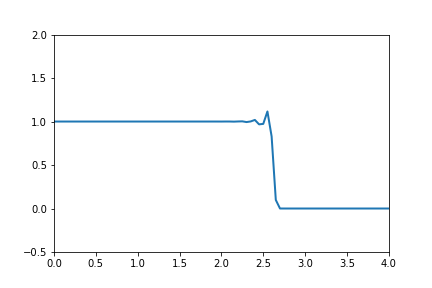
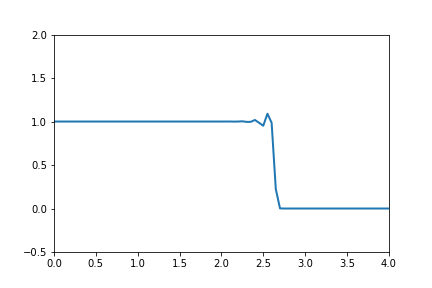
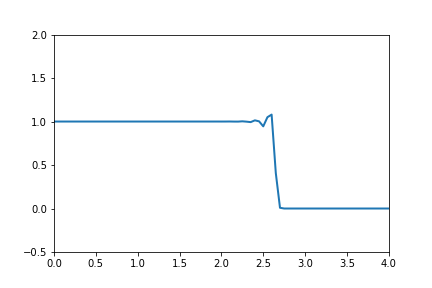
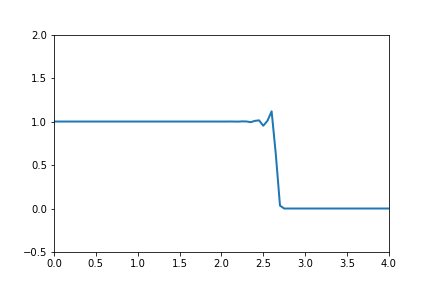
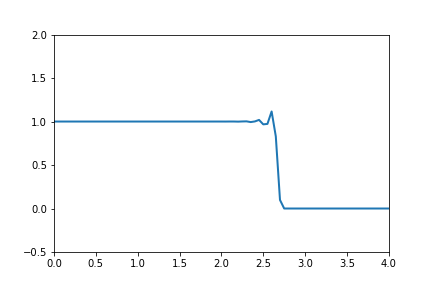
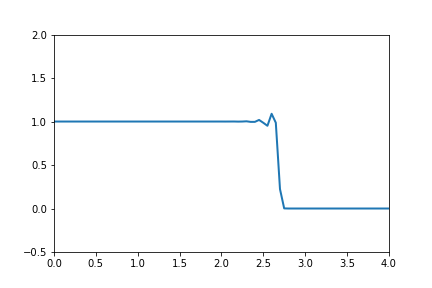
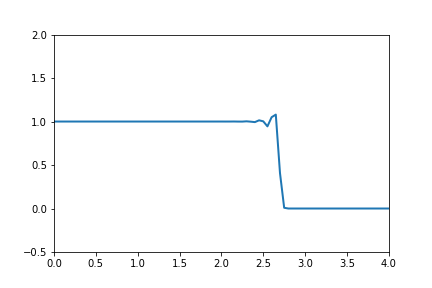
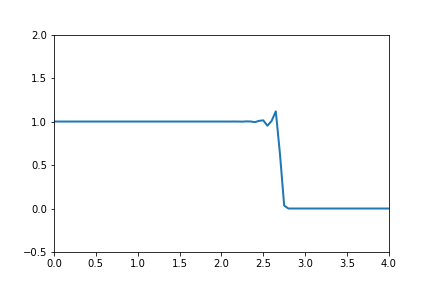
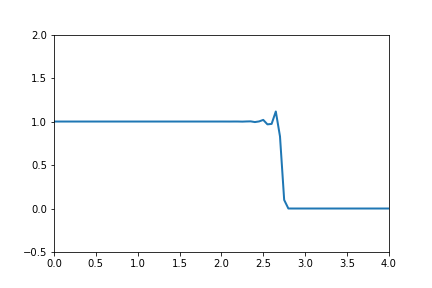
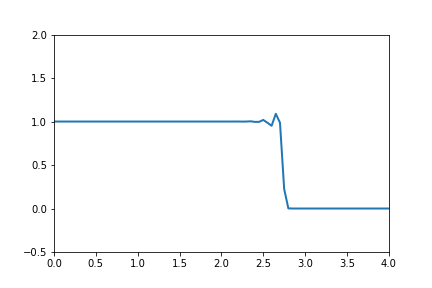
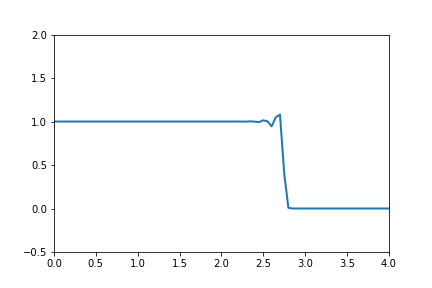
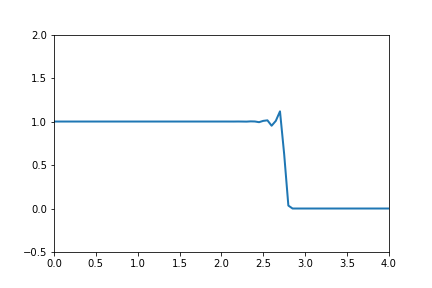
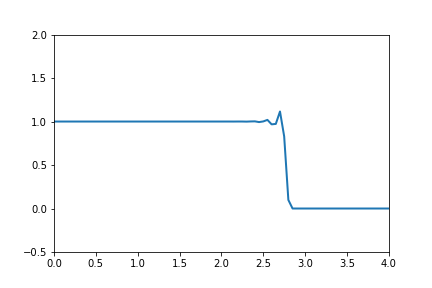
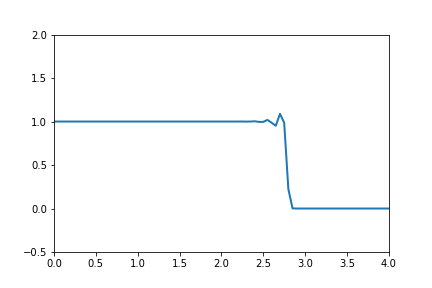
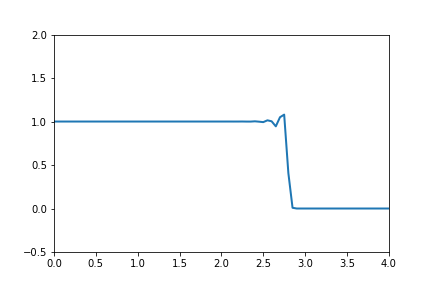
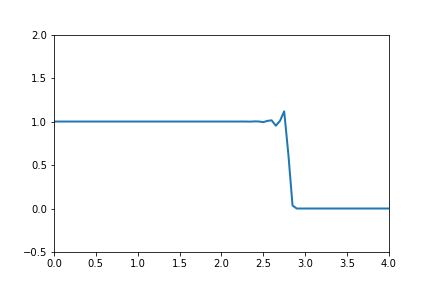
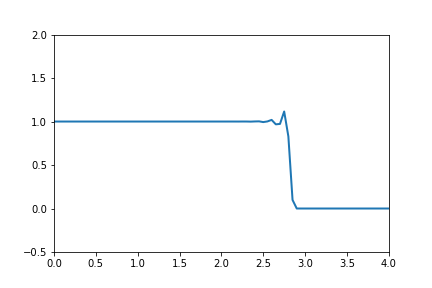
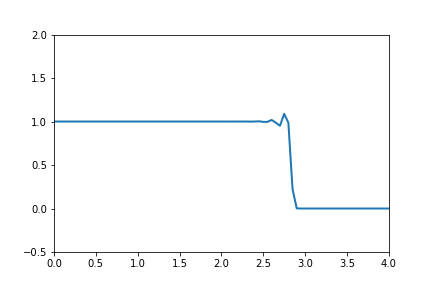

In [5]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
def u_initial(nx):
     u=numpy.zeros(nx)
     u[:int((nx-1)*0.5)]=1
     return u
def computeF(u):
    return (u**2)/2
def maccormack(u, nt, dt, dx):
    un = numpy.zeros((nt,len(u)))
    ustar=numpy.empty_like(u)
    un[:,:] = u.copy()
    ustar = u.copy()    

    for n in range(1,nt):
        F = computeF(u)
        
        ustar[:-1] = u[:-1] - dt/dx * (F[1:] - F[:-1])
        Fstar = computeF(ustar)

        un[n,1:] = 0.5 * (u[1:] + ustar[1:] - dt/dx * (Fstar[1:]-Fstar[:-1])) 
       

        u = un[n].copy()

    return un

nx = 81
nt = 70
dx = 4.0/(nx-1)

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

u = u_initial(nx)
sigma = .5
dt = sigma*dx

un = maccormack(u,nt,dt,dx)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')